In [1]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

# 最后一题

In [2]:
#定义语法内容
grammar = """
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [3]:
# 定义语法创建函数，将语法字符串转换为语法规则字典，键值为声明，值为表达式
def build_grammar(grammar_str,split="="):
    grammar_dict = {}
    l = []
    for line in grammar.split("\n"):
        if not line:
            continue
        stmt,expr = line.split(split)
        stmt = stmt.strip()
        expr = [e.split() for e in expr.split('|')]
        grammar_dict[stmt] = expr
    return grammar_dict

In [4]:
grammar_dict = build_grammar(grammar)
grammar_dict

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']],
 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [5]:
# 定义语句生成函数，给定目标声明('sentence','adj'...)和语法规则字典，随机生成语句
def generate(targetStmt,grammar_dict):
    if targetStmt == 'null': # null 应该返回空字符串，而不是'null'
        return ''
    if targetStmt not in grammar_dict: # 解析至最终单词，结束递归
        return targetStmt
    expr = random.choice(grammar_dict[targetStmt])
    return ''.join([generate(e,grammar_dict) for e in expr])

In [6]:
generate('sentence',grammar_dict)

'蓝色和好看的女人安静地坐着蓝色和漂亮的皮球'

# BFS 广度优先搜索 DFS 深度优先搜索

In [7]:
#定义无向图
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}
#去重
for k in graph:
    graph[k] = set(graph[k].split())

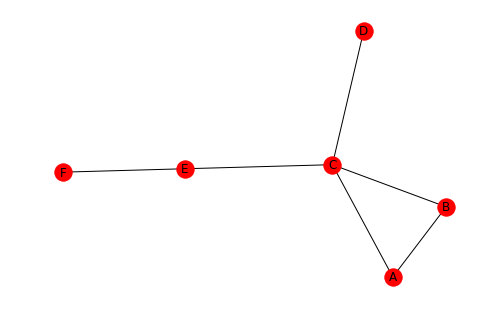

In [8]:
Graph = networkx.Graph(graph)
networkx.draw(Graph, with_labels=True)

## BFS

In [18]:
seen = set()
need_visit = ['C']
while need_visit:
    node = need_visit.pop(0)
    if node not in seen:
        print ("I am looking at %s" % node)
        seen.add(node)
        need_visit = need_visit + list(graph[node])

I am looking at C
I am looking at D
I am looking at B
I am looking at A
I am looking at E
I am looking at F


## DFS

In [20]:
#定义无向长图
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}
for n in graph_long: graph_long[n] = graph_long[n].split()

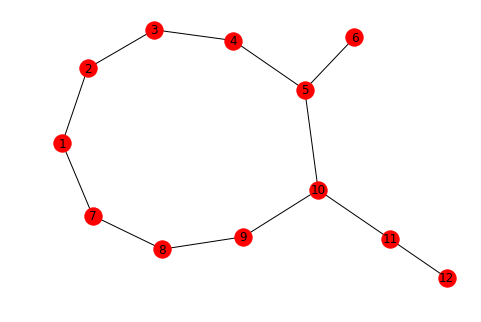

In [21]:
Graph_long = networkx.Graph(graph_long)
networkx.draw(Graph_long, with_labels=True)

In [24]:
seen = set()
need_visit = ['1']
while need_visit:
    node = need_visit.pop(0)
    if node not in seen:
        print ("I am looking at %s" % node)
        seen.add(node)
        need_visit = list(graph_long[node]) + need_visit

I am looking at 1
I am looking at 2
I am looking at 3
I am looking at 4
I am looking at 5
I am looking at 6
I am looking at 10
I am looking at 11
I am looking at 12
I am looking at 7
I am looking at 8
I am looking at 9


## Repetition is the mother of evil.

In [27]:
def search(graph,start,concat_func):
    seen = set()
    need_visit = [start]
    while need_visit:
        node = need_visit.pop(0)
        if node not in seen:
            print ("I am looking at %s" % node)
            seen.add(node)
            new_discovered = list(graph[node])
            need_visit = concat_func(new_discovered,need_visit)

def new_discovered_first(new_discovered,need_visit):
    return new_discovered + need_visit

def already_discovered_first(new_discovered,need_visit):
    return need_visit + new_discovered

In [28]:
from functools import partial
dfs = partial(search,concat_func=new_discovered_first)
bfs = partial(search,concat_func=already_discovered_first)

In [29]:
dfs(graph_long,'1')

I am looking at 1
I am looking at 2
I am looking at 3
I am looking at 4
I am looking at 5
I am looking at 6
I am looking at 10
I am looking at 11
I am looking at 12
I am looking at 7
I am looking at 8
I am looking at 9


In [32]:
bfs(graph_long,'1')

I am looking at 1
I am looking at 2
I am looking at 7
I am looking at 3
I am looking at 8
I am looking at 4
I am looking at 9
I am looking at 5
I am looking at 10
I am looking at 6
I am looking at 11
I am looking at 12


## Mapping

In [33]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [64]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ},
    SG : {GZ,SZ} # 加上SG 
}

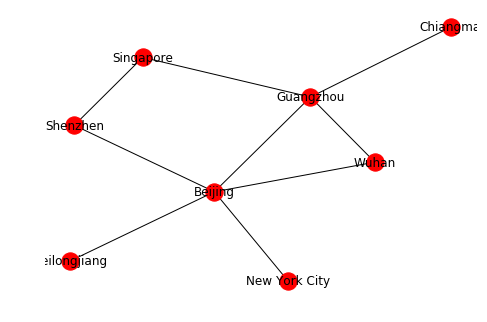

In [65]:
air_route = networkx.Graph(air_route)
networkx.draw(air_route, with_labels=True)

In [76]:
def search_pathes(graph,start,destination,all_path=True):
    seen = set()
    pathes = [[start]]
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if (not all_path) and (frontier in seen): continue # all_path为False时，只会得到最短路径
        seen.add(frontier)
        for city in graph[frontier]:
            if city in path: continue # 避免搜索到 类似NY-BJ-NY 的path
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                chosen_pathes.append(new_path)
    return chosen_pathes

In [84]:
def draw_route(pathes): return '\n'.join(' ✈️ -> '.join(path) for path in pathes)

In [89]:
pathes = search_pathes(air_route,SZ,CM,all_path=True)

In [92]:
print (draw_route(pathes))

Shenzhen ✈️ -> Beijing ✈️ -> Guangzhou ✈️ -> Chiangmai
Shenzhen ✈️ -> Singapore ✈️ -> Guangzhou ✈️ -> Chiangmai
Shenzhen ✈️ -> Beijing ✈️ -> Wuhan ✈️ -> Guangzhou ✈️ -> Chiangmai


In [93]:
pathes = search_pathes(air_route,SZ,CM,all_path=False)

In [94]:
print (draw_route(pathes))

Shenzhen ✈️ -> Beijing ✈️ -> Guangzhou ✈️ -> Chiangmai
